## ライブラリインストール

In [1]:
%pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 9.8 MB/s eta 0:00:0010.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 9.9 MB/s eta 0:00:000m eta 0:00:010:01:02

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 3.2 パーセプトロン

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y # stratifyはクラスラベルの比率をtrainとtestで均一にする
)

In [4]:
print("Label counts in y:", np.bincount(y))
print("Labels counts in y_train", np.bincount(y_train))
print("Labels counts in y_test", np.bincount(y_test))

Label counts in y: [50 50 50]
Labels counts in y_train [35 35 35]
Labels counts in y_test [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred = ppn.predict(X_test_std)
errs = (y_test != y_pred).sum()
print(f"Misclassified examples: {errs}")

Misclassified examples: 1


In [ ]:
from sklearn.metrics import accuracy_score

print(f"Accuracy: {(accuracy_score(y_test, y_pred)):.3f}")

Accuracy: 0.978


In [11]:
print(f"Accuracy: {(ppn.score(X_test_std, y_test)):.3f}")

Accuracy: 0.978


In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(
        X: np.ndarray, 
        y: np.ndarray, 
        classifier: Perceptron, 
        test_idx: int = None,
        resolution: float = 0.02
    ):
    # マーカーとカラーマップの準備
    markers = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), 
        np.arange(x2_min, x2_max, resolution)
    )

    # 各特徴量を1次元配列に変換して予測を実行
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    # 予測結果を元のグリッドポイントのデータサイズに変換
    lab = lab.reshape(xx1.shape)

    # グリッドポイントの等高線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y==cl, 0],
            y=X[y==cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f"Class {cl}",
            edgecolors="black"
        )

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c="none", edgecolors="black",
                    alpha=1.0, linewidths=1, marker="o", s=100, label="Test set")

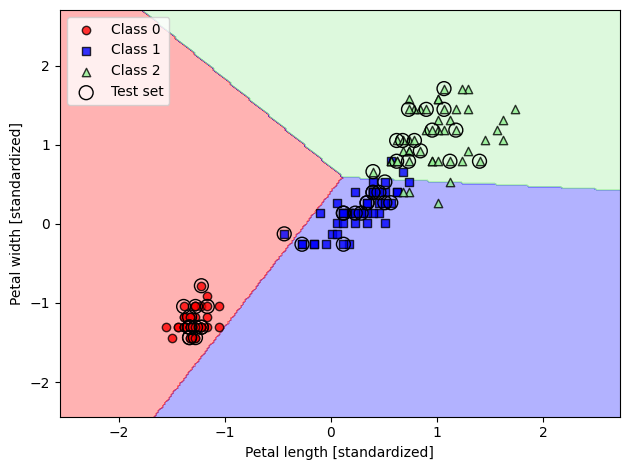

In [13]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

## 3.3 ロジスティック回帰

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/var/folders/qd/2j9x_2nd57577kjr0lf7p1p40000gn/T/ipykernel_7671/1858394749.py:14: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\sigma (z)$")


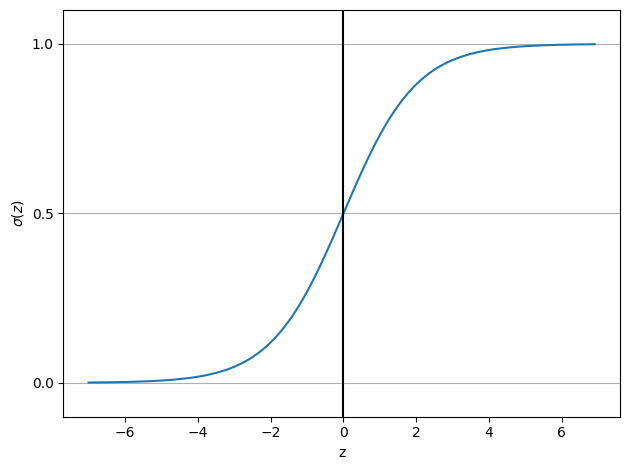

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)

plt.axvline(0.0, color="k")
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("$\sigma (z)$")
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/var/folders/qd/2j9x_2nd57577kjr0lf7p1p40000gn/T/ipykernel_7671/3997239421.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma (z)")


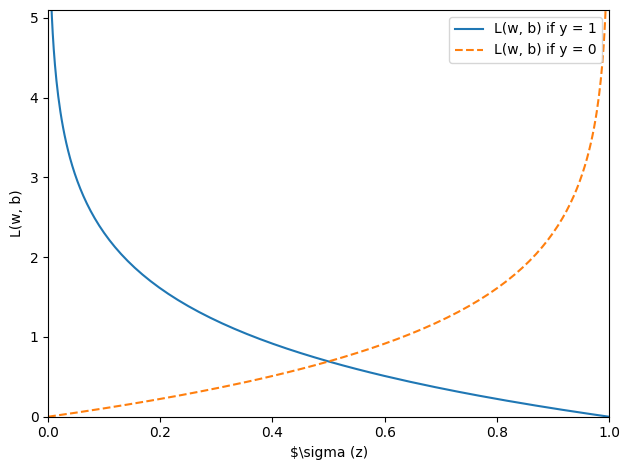

In [18]:
def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label="L(w, b) if y = 1")
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle="--", label="L(w, b) if y = 0")

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel("$\sigma (z)")
plt.ylabel("L(w, b)")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [29]:
class LogisticRegressionGD:
    """
    ADAptive LInear NEuron分類器

    パラメータ
    - eta: float
        - 学習率
    - n_iter: int
        - 訓練データの訓練回数
    - random_state: int
        - 重みを初期化する際の乱数シード

    属性
    - w_: 一次元配列
        - 適合後の重み
    - b_: スカラー
        - 適合後のバイアス
    - losses_: リスト
        - 各エポックでのMSE誤差関数の値
    """

    def __init__(self, eta: float = 0.01, n_iter: int = 50, random_state: int = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        訓練データに適合させる

        パラメータ
        - X: 配列のようなデータ構造
            - shape = [n_examples, n_features]
            - 訓練データ
            - n_examplesは訓練データの個数, n_featuresは特徴量の個数
        - y: 配列のようなデータ構造
            - shape = [n_features]
            - 目的変数

        戻り値
        - self: LogisticRegressionGDのインスタンス
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * errors @ X / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y @ np.log(output) - ((1 - y) @ np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        
        return self
    
    def net_input(self, X: np.ndarray):
        # return np.dot(X, self.w_) + self.b_
        return X @ self.w_ + self.b_
        
    # ADALINEの活性化関数は単なる恒等関数だが、ロジスティック回帰などはシグモイド関数に変更可
    def activation(self, z: np.ndarray):
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X: np.ndarray):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

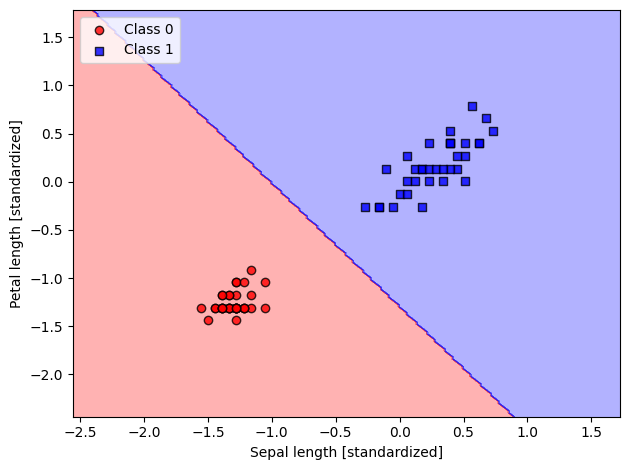

In [30]:
X_train_01_subset = X_train_std[(y_train==0) | (y_train==1)]
y_train_01_subset = y_train[(y_train==0) | (y_train==1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

/Users/stupidyoshiaki/.asdf/installs/python/3.13.0/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


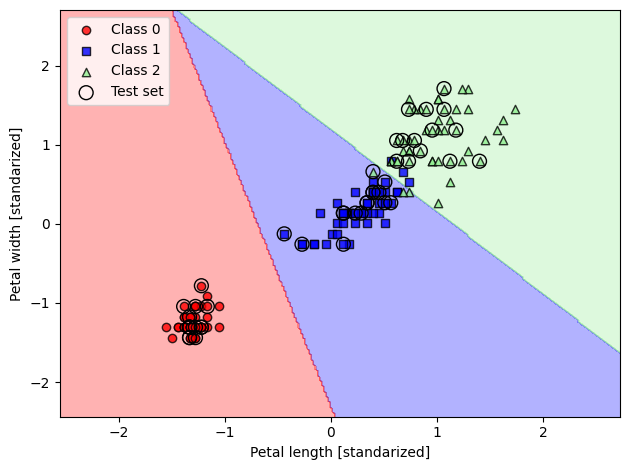

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver="lbfgs", multi_class="ovr")
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel("Petal length [standarized]")
plt.ylabel("Petal width [standarized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [35]:
print(lr.predict_proba(X_test_std[:3, :]))
print(lr.predict(X_test_std[:3, :]))
print(lr.predict(X_test_std[0, :].reshape(1, -1)))

[[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]
[2 0 0]
[2]


/Users/stupidyoshiaki/.asdf/installs/python/3.13.0/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/stupidyoshiaki/.asdf/installs/python/3.13.0/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/stupidyoshiaki/.asdf/installs/python/3.13.0/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn

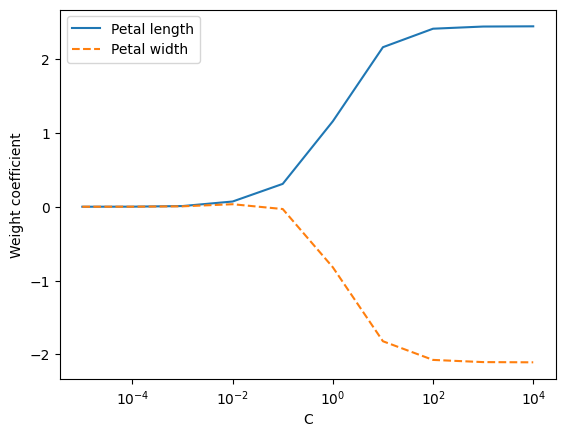

In [42]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, multi_class="ovr")
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

plt.plot(params, weights[:, 0], label="Petal length")
plt.plot(params, weights[:, 1], linestyle="--", label="Petal width")
plt.ylabel("Weight coefficient")
plt.xlabel("C")
plt.legend(loc="upper left")
plt.xscale("log")
plt.show()

## 3.4 サポートベクトルマシン

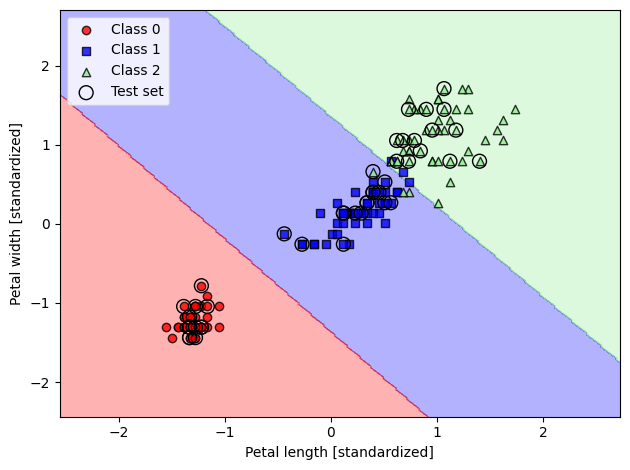

In [43]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

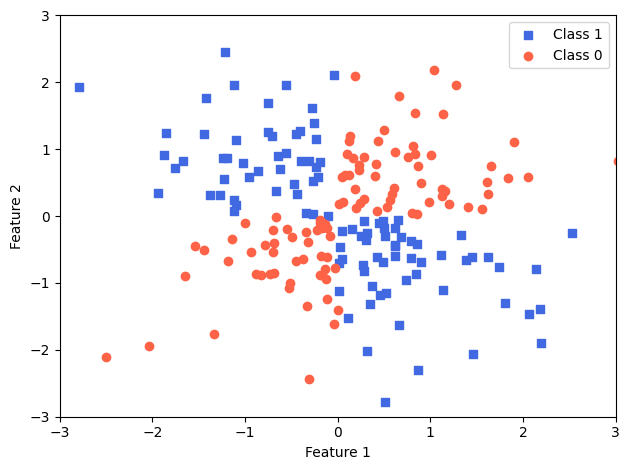

In [44]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c="royalblue", marker="s", label="Class 1")
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c="tomato", marker="o", label="Class 0")

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

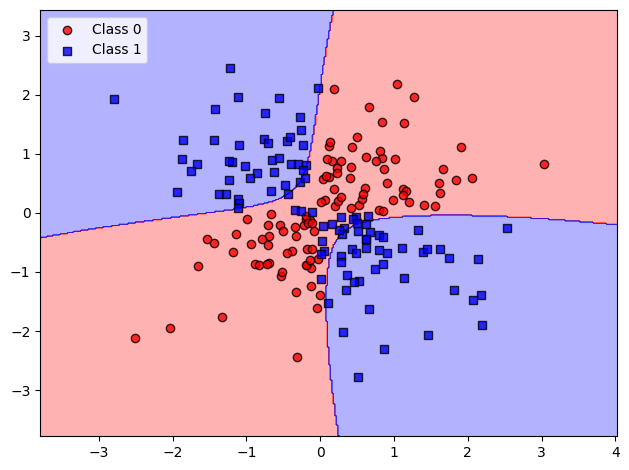

In [45]:
svm = SVC(kernel="rbf", C=10.0, random_state=1, gamma=0.10)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

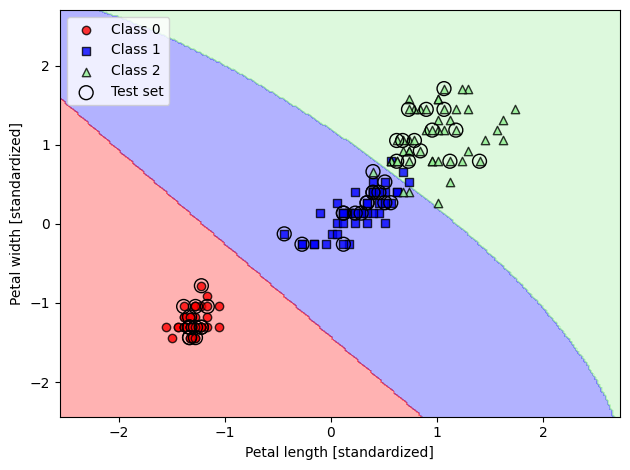

In [48]:
svm = SVC(kernel="rbf", C=10.0, random_state=1, gamma=0.10)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

## 3.6 決定木

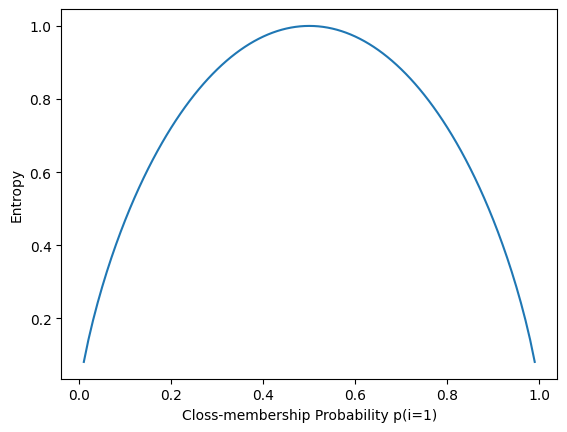

In [49]:
def entropy(p: float) -> float:
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]

plt.ylabel("Entropy")
plt.xlabel("Closs-membership Probability p(i=1)")
plt.plot(x, ent)
plt.show()

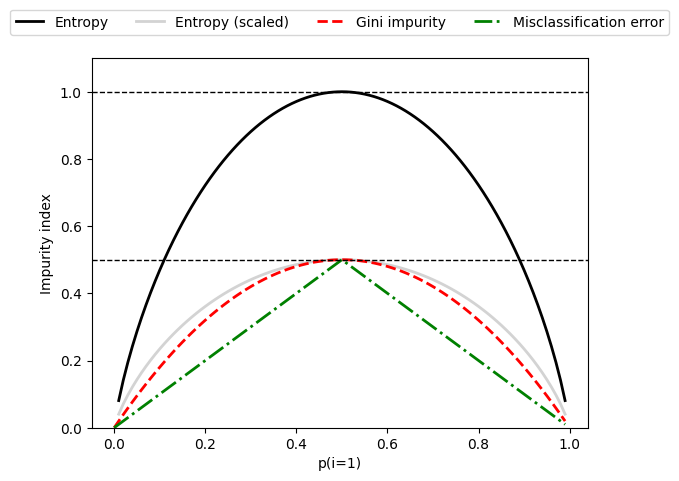

In [50]:
import matplotlib.pylab as plt
import numpy as np

def gini(p: float) -> float:
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p: float) -> float:
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

def error(p: float) -> float:
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err], 
                         ["Entropy", "Entropy (scaled)", "Gini impurity", "Misclassification error"],
                         ["-", "-", "--", "-."],
                         ["black", "lightgray", "red", "green", "cyan"]):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color="k", linestyle="--")
ax.axhline(y=1.0, linewidth=1, color="k", linestyle="--")

plt.ylim([0, 1.1])
plt.xlabel("p(i=1)")
plt.ylabel("Impurity index")
plt.show()

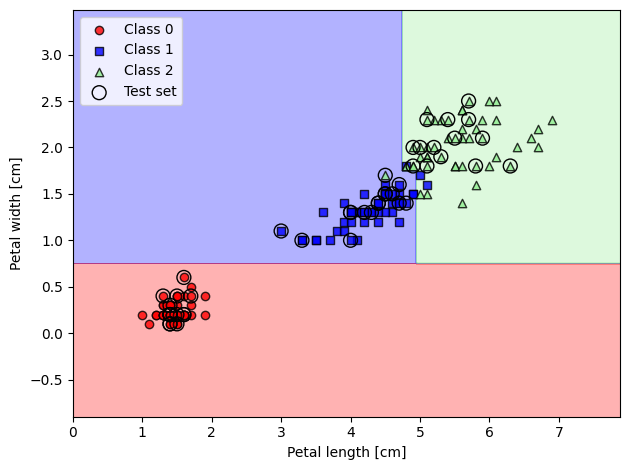

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack([X_train, X_test])
y_combined = np.hstack([y_train, y_test])
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel("Petal length [cm]")
plt.ylabel("Petal width [cm]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

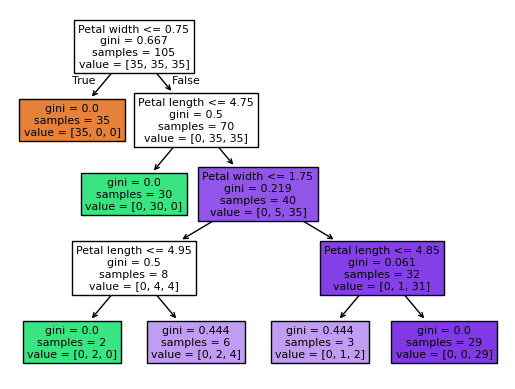

In [54]:
from sklearn import tree

feature_names = ["Petal length", "Petal width"]
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

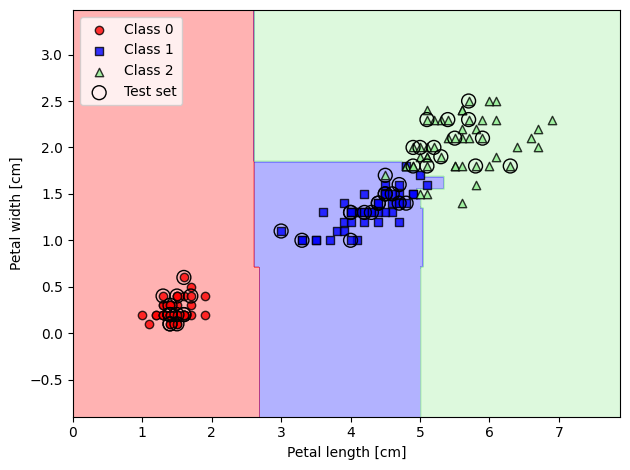

In [55]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel("Petal length [cm]")
plt.ylabel("Petal width [cm]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

## 3.7 kNN

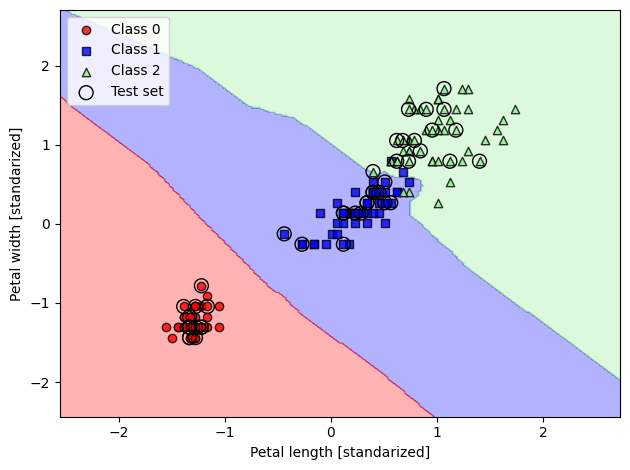

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel("Petal length [standarized]")
plt.ylabel("Petal width [standarized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()